Voici notre projet :)

In [1]:
import pandas as pd
import random as rd
import matplotlib.pyplot as plt
import numpy as np

filename = "Commandes_clients.csv"
df = pd.read_csv(filename)

print(df.head(30))

    IdCommande  IdClient  IdProduit  Date  Quantite
0            1         8          1  1995       225
1            2        14          1  1995       125
2            3        11          9  1995       150
3            4        11          5  1996        25
4            5        11         10  1996       175
5            6         9          8  1996       125
6            7         7          3  1996       250
7            8        12          8  1996       150
8            9        13          3  1996       200
9           10         8          1  1996       200
10          11        11          9  1996        25
11          12         9         10  1996       125
12          13         6          8  1996        75
13          14         4          5  1996       225
14          15         1          3  1996       150
15          16         1          7  1996       250
16          17         7          3  1996       200
17          18         9          1  1996        75
18          

In [2]:
filename = "Remises.csv"
df_remises = pd.read_csv(filename)
print(df_remises.head(20))

    Remise  IdProduit  IdClient
0        6         10         1
1        4          8        14
2       15          3        11
3       22          5        14
4       12          2         5
5        1          7        11
6       14          9        12
7        5          1         5
8        1          2         9
9       10          1        11
10       9          6         5
11      17          2         6
12      21          2         5
13       2          6         3
14       6          7        13
15       3          8        12
16       2          8        14
17       1          3         2
18       4          5         6
19      14          9         5


In [3]:
filename = "Produits.csv"
df_produit = pd.read_csv(filename)
print(df_produit)

   Prix  Marge             Nom
0    53     29        Teinture
1    30     30         Ciseaux
2    70     25   Seche_cheveux
3    10     40       Shampoing
4    27     23      Extensions
5    12      9             Gel
6    17      6           Laque
7     5      4           Gants
8    15     20          Brosse
9   750     20  Casque_sechage


In [4]:
filename = "Clients.csv"
df_client = pd.read_csv(filename, encoding='utf-8')
print(df_client)

                    Nom
0            Attrac'tif
1        Communaut'hair
2         Quoi ? Feur !
3              Rela'tif
4           Superla'tif
5            Pendan'tif
6         Helicopt'hair
7             Prec'hair
8          Boulang'hair
9         Poissoni'hair
10     Perpendicul'hair
11            Calc'hair
12  L'atelier du cheveu
13          Centen'hair
14             Addi'tif


In [6]:
print(int(df["Quantite"][148]*df_produit["Prix"][df["IdProduit"][148]]))
cost = []
for i in list(df.index):
    cost.append(df["Quantite"][i] * df_produit["Prix"][df["IdProduit"][i]-1])
    
df["Cost"] = cost

df_importance = df.groupby(["IdClient"]).sum().sort_values(by="Cost", ascending=False)
print(df_importance)
NomClient_importance = [df_client["Nom"][i-1] for i in list(df_importance.index)]
df_importance["Nom"] = NomClient_importance

print(df_importance)

iter = True
while iter:
    nomSelect = input("Selection : ")
    iter = not(nomSelect in list(df_client["Nom"]))
idselect = list(df_client["Nom"]).index(nomSelect)+1

1800
          IdCommande  IdProduit   Date  Quantite    Cost
IdClient                                                
13              1195         90  28072      2200  571825
5                654         79  20026      1750  418225
2                848         72  20053      1700  382100
10              1593         81  32109      1925  345575
8                794         56  20042      1825  242400
7               1529         84  34095      2450  231675
14               816         65  26032      1850  231275
11               629         65  24015      1475  178125
1                702         75  24025      1425  153400
3                483         26  10032       475  138450
9                203         35   9999       800  100725
4                412         43  14016       900   83500
15               725         25  16048       850   34025
12               382         38  10021       725   10025
6                210         35  10000       550    6625
          IdCommande  IdPr

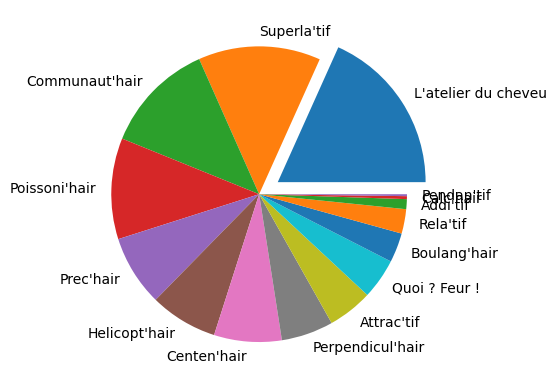

In [7]:
total = df["Cost"].sum()
explosion = [0] * df_importance.shape[0]
explosion[list(df_importance.index).index(idselect)] = 0.15
camLabel = []
for i in list(df_importance.index):
    camLabel.append(df_client["Nom"][i-1])

plt.pie(df_importance["Cost"], labels = camLabel, explode = explosion)
plt.show()

     IdCommande  IdClient  IdProduit  Date  Quantite    Cost
8             9        13          3  1996       200   14000
34           35        13          2  1999       150    4500
35           36        13         10  1999       250  187500
39           40        13          9  2000       150    2250
40           41        13         10  2000       150  112500
50           51        13          5  2001        75    2025
76           77        13          1  2005       100    5300
100         101        13          5  2006       200    5400
109         110        13         10  2007       250  187500
119         120        13          6  2009       175    2100
138         139        13          9  2012        75    1125
142         143        13          5  2012       225    6075
143         144        13         10  2012        50   37500
148         149        13          5  2014       150    4050


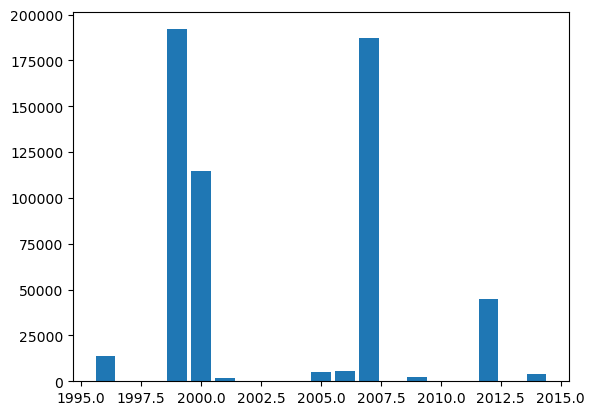

In [8]:
df_graphclient = df[df["IdClient"]==idselect]
print(df_graphclient)
df_histo = df_graphclient.groupby(["Date"]).sum().sort_values(by="Date", ascending=True)
plt.bar(height = df_histo["Cost"], x = list(df_histo.index))
plt.show()

In [9]:
df_remisesClient = df_remises[df_remises["IdClient"]==idselect]

print("Pour le client", df_client["Nom"][idselect-1], ":")
if list(df_remisesClient.index):
    for i in list(df_remisesClient.index):
        print("Remise de {}% sur le produit n°{} ({})".format(df_remisesClient["Remise"][i], df_remisesClient["IdProduit"][i], df_produit["Nom"][df_remisesClient["IdProduit"][i]]))
else:
    print("Pas de remise pour ce client")

Pour le client L'atelier du cheveu :
Remise de 6% sur le produit n°7 (Gants)


In [10]:
best = [-1, -1]
score_max = 0

df_clientPProduit = df_graphclient.groupby(["IdProduit"]).sum()

for i in list(df_graphclient.index):
    if not(df_graphclient["IdProduit"][i] in list(df_remisesClient["IdProduit"])):
        margeP = df_produit["Marge"][df_graphclient["IdProduit"][i]-1]
        qteP = df_clientPProduit["Quantite"][df_graphclient["IdProduit"][i]]
        prixP = df_produit["Prix"][df_graphclient["IdProduit"][i]-1]
        score = margeP * qteP * prixP
        if score > score_max:
            score_max = score
            propRemise = rd.randint(1, int(df_produit["Marge"][df_graphclient["IdProduit"][i]-1])-1)
            best = [df_graphclient["IdProduit"][i], propRemise]

if score_max != 0:
    print("Remise avantageuse détectée !")
    print("Conseil : accordez {}% de remise au client {} sur le produit n°{} ({}), afin de le fidéliser !".format(best[1], df_client["Nom"][idselect-1], best[0], df_produit["Nom"][best[0]-1]))
else:
    print("Pas de remise suggérée... :(")

Remise avantageuse détectée !
Conseil : accordez 3% de remise au client L'atelier du cheveu sur le produit n°10 (Casque_sechage), afin de le fidéliser !
